In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import plotly.express as px


In [ ]:
# Import CSV with renamed columns
df = pd.read_csv('seoul_bike_data_renamed.csv')
    
# Clean up some columns
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")
df["datetime"] = df.apply(lambda row: row["date"] + timedelta(hours=row["hour"]), axis=1)
df["is_holiday"] = df["is_holiday"].map({"No Holiday": False, "Holiday": True})

# Similar to is_holiday, map is_functioning to True and False
df["is_functioning"] = df["is_functioning"].map({"Yes": True, "No": False})

# Print out the result
df

,date,n_rented_bikes,hour,temperature_celsius,humidity_pct,wind_speed_mps,visibility_10m,dew_point_temp_c,solar_radiation,rainfall_mm,snowfall_cm,season,is_holiday,is_functioning,datetime
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,False,True,2017-12-01 00:00:00
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,False,True,2017-12-01 01:00:00
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,False,True,2017-12-01 02:00:00
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,False,True,2017-12-01 03:00:00
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,False,True,2017-12-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,False,True,2018-11-30 19:00:00
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,False,True,2018-11-30 20:00:00
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,False,True,2018-11-30 21:00:00
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,False,True,2018-11-30 22:00:00


In [ ]:
# check data info
df.info()
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 8760 non-null   datetime64[ns]
 1   n_rented_bikes       8760 non-null   int64         
 2   hour                 8760 non-null   int64         
 3   temperature_celsius  8760 non-null   float64       
 4   humidity_pct         8760 non-null   int64         
 5   wind_speed_mps       8760 non-null   float64       
 6   visibility_10m       8760 non-null   int64         
 7   dew_point_temp_c     8760 non-null   float64       
 8   solar_radiation      8760 non-null   float64       
 9   rainfall_mm          8760 non-null   float64       
 10  snowfall_cm          8760 non-null   float64       
 11  season               8760 non-null   object        
 12  is_holiday           8760 non-null   bool          
 13  is_functioning       8760 non-nul

Index(['date', 'n_rented_bikes', 'hour', 'temperature_celsius', 'humidity_pct',
       'wind_speed_mps', 'visibility_10m', 'dew_point_temp_c',
       'solar_radiation', 'rainfall_mm', 'snowfall_cm', 'season', 'is_holiday',
       'is_functioning', 'datetime'],
      dtype='object')

In [ ]:
# check distinct value 
distinct_values = df.nunique().sort_values(ascending=True)
distinct_values

is_holiday                2
is_functioning            2
season                    4
hour                     24
snowfall_cm              51
rainfall_mm              61
wind_speed_mps           65
humidity_pct             90
solar_radiation         345
date                    365
temperature_celsius     546
dew_point_temp_c        556
visibility_10m         1789
n_rented_bikes         2166
datetime               8760
dtype: int64

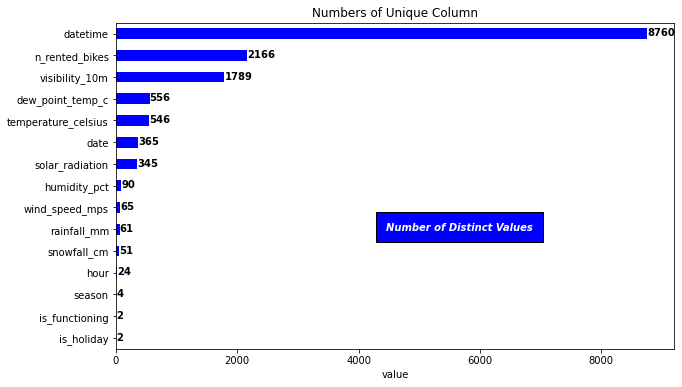

In [ ]:
# visualize distinct values
fig, ax = plt.subplots(figsize=(10,6))
distinct_values.sort_values(ascending=True).plot(kind='barh', color='b')

#add label for each bars
for index, values in enumerate(distinct_values):
  ax.text(values, index-0.1, values, color='k', weight='bold')

fig.text(0.5, 0.4, 'Number of Distinct Values', color='white', weight='bold',style='italic',bbox={'facecolor': 'b', 'alpha': 1, 'pad': 10})
 
# add title 
ax.set_title('Numbers of Unique Column')
ax.set_xlabel('value')
plt.show()


In [ ]:
# check missing values
df.isnull().sum().sort_values(ascending=False)

date                   0
n_rented_bikes         0
hour                   0
temperature_celsius    0
humidity_pct           0
wind_speed_mps         0
visibility_10m         0
dew_point_temp_c       0
solar_radiation        0
rainfall_mm            0
snowfall_cm            0
season                 0
is_holiday             0
is_functioning         0
datetime               0
dtype: int64

# EDA

In [ ]:
# visualize bike rental overtime
px.line(df, x='datetime', y='n_rented_bikes', title='time of bike rentals/day',markers='o')

In [ ]:
# total number of rented bikes per day

rent_per_day = df.groupby('date')[['n_rented_bikes']].sum()
px.line(rent_per_day, x=rent_per_day.index, y='n_rented_bikes', title='total number of rented bikes/day',markers='o')

In [ ]:
# total number of rented bikes per season
rent_per_season = df.groupby(['date','season'], as_index=False)[['n_rented_bikes']].sum()
px.line(rent_per_season, x='date', y='n_rented_bikes', title='total number of rented bikes/season',markers='o',color='season')


In [ ]:
#relation between temperature at noon vs rented bikes
noon_rides = df.query('hour == 12')

#showing data with scatter plot graph
px.scatter(noon_rides, x='temperature_celsius', y='n_rented_bikes', trendline='lowess', title='numbers of rented bikes at noon')

# Explore relation between weather and rentals

In [ ]:
px.scatter(noon_rides, x='wind_speed_mps', y='n_rented_bikes', trendline='lowess',title='numbers of rented bikes vs wind_speed_mps at noon')

In [ ]:
px.scatter(noon_rides, x='humidity_pct', y='n_rented_bikes', trendline='lowess',title='numbers of rented bikes vs humidity at noon')

In [ ]:
px.scatter(noon_rides, x='visibility_10m', y='n_rented_bikes', trendline='lowess', title='numbers of rented bikes vs visibility_10m at noon')


In [ ]:
px.scatter(noon_rides, x='rainfall_mm', y='n_rented_bikes', trendline='ols', title='numbers of rented bikes vs rainfall_mm at noon')


In [ ]:
px.scatter(noon_rides, x='snowfall_cm', y='n_rented_bikes', trendline='ols',title='numbers of rented bikes vs snowfall_cm at noon')

# Explore typical daily usage pattern

In [ ]:
# average number of rented bikes per hour
rent_per_time = df.groupby(['hour'], as_index=False)[['n_rented_bikes']].mean()
px.bar(rent_per_time, x='hour', y='n_rented_bikes', title='numbers of rented bikes per time', text_auto=True, color="n_rented_bikes")

In [ ]:
# average number of rented bikes per season
rent_per_season = df.groupby(['hour','season'], as_index=False)[['season','n_rented_bikes']].mean()
rent_per_season.sort_values(by='n_rented_bikes', ascending=False, inplace=True)
rent_per_season.reset_index(drop=True,inplace=True)
px.bar(rent_per_season, x='hour', y='n_rented_bikes', title='numbers of rented bikes per season', color="season", facet_col='season')

In [ ]:
# show comparison rented bikes at new year eve
new_year_start=pd.to_datetime("2017 12 31 00")
new_year_end = pd.to_datetime("2018 01 01 23")


new_year = df[(df['datetime']>=new_year_start) & (df['datetime']<=new_year_end)] 

px.line(new_year, x='datetime', y="n_rented_bikes",markers='o',text='n_rented_bikes', title='rented bikes at new year eve' )
